In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

data = pd.read_csv(r"onlinefoods.csv")


In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


Now let’s move to the analysis of this data. I will start by looking at the online food order decisions based on the age of the customer:

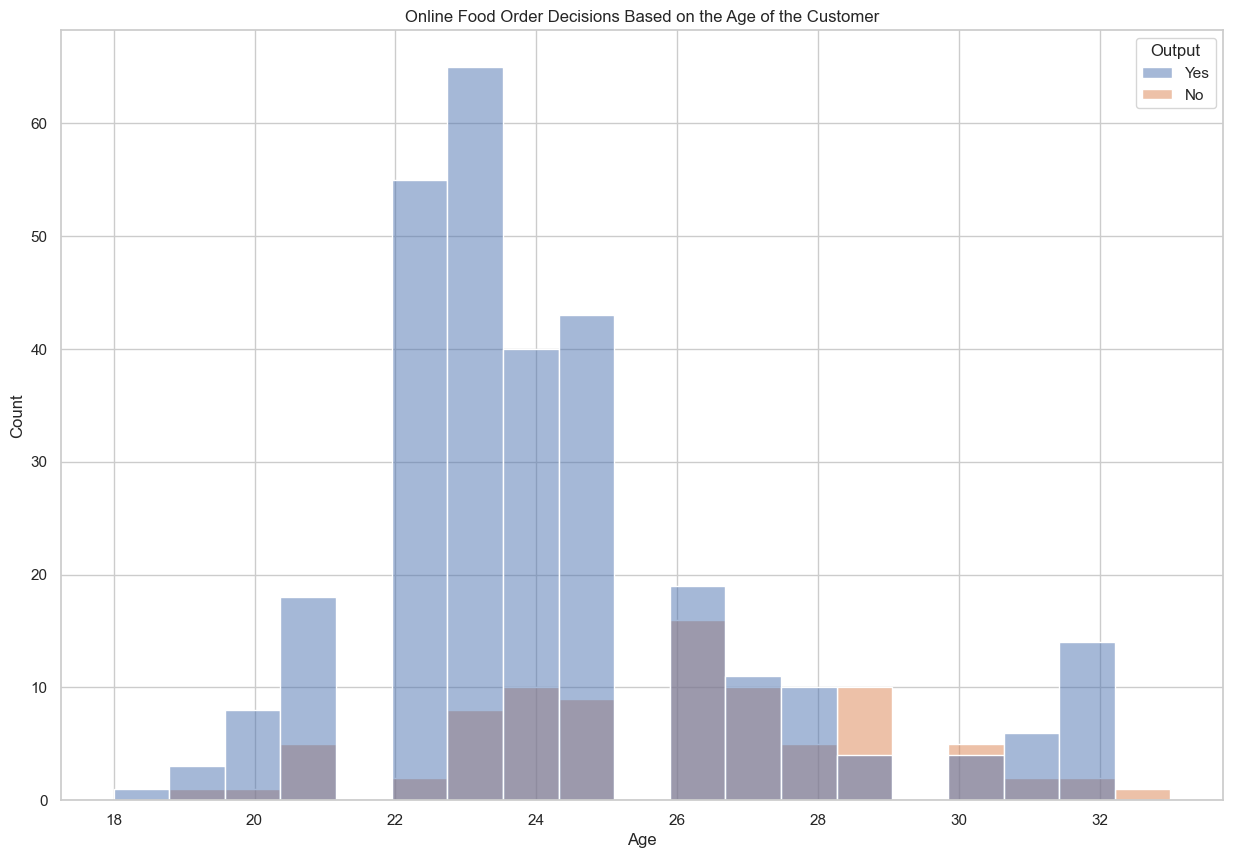

In [5]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=data)
plt.show()

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. Now let’s have a look at the online food order decisions based on the size of the family of the customer:



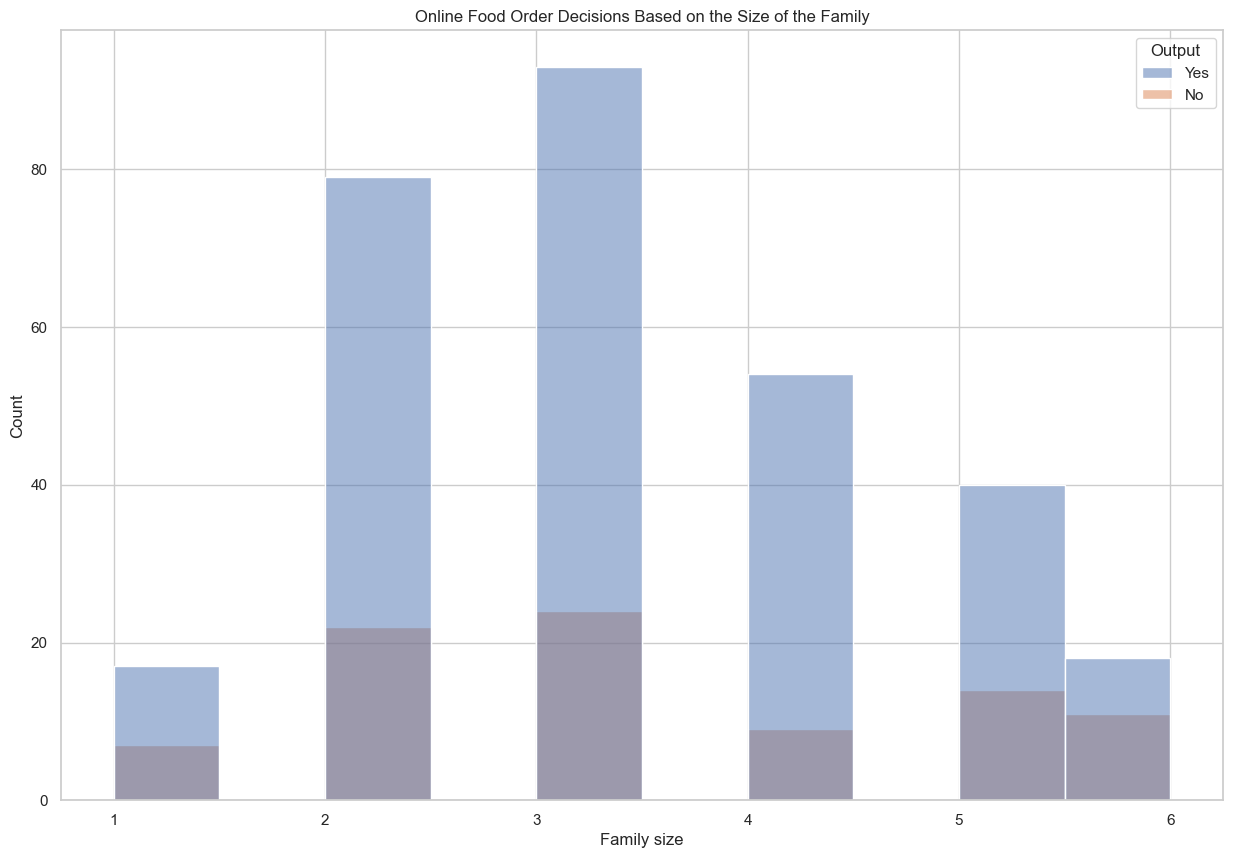

In [6]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

Let’s create a dataset of all the customers who ordered the food again:

In [7]:
buying_again_data = data.query("Output == 'Yes'")
buying_again_data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


Now let’s have a look at the gender column. Let’s find who orders food more online:

In [8]:
gender = buying_again_data["Gender"].value_counts()
gender

Gender
Male      175
Female    126
Name: count, dtype: int64

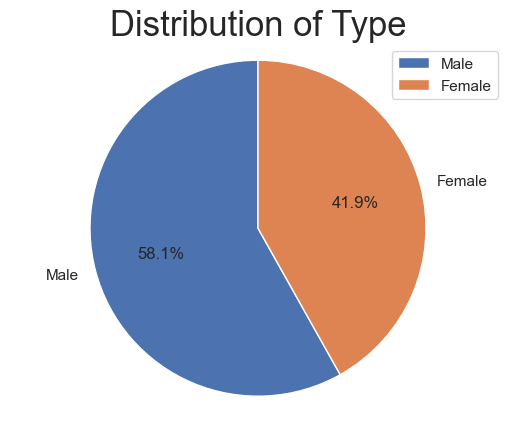

In [9]:
labels = "Male","Female"
plt.pie(x= gender,autopct='%1.1f%%',
shadow=False,startangle=90,labels=labels)
plt.axis('equal')
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()


According to the dataset, male customers are ordering more compared the females. Now let’s have a look at the marital status of the customers who ordered again:

In [10]:
marital = buying_again_data["Marital Status"].value_counts()
marital

Marital Status
Single               229
Married               66
Prefer not to say      6
Name: count, dtype: int64

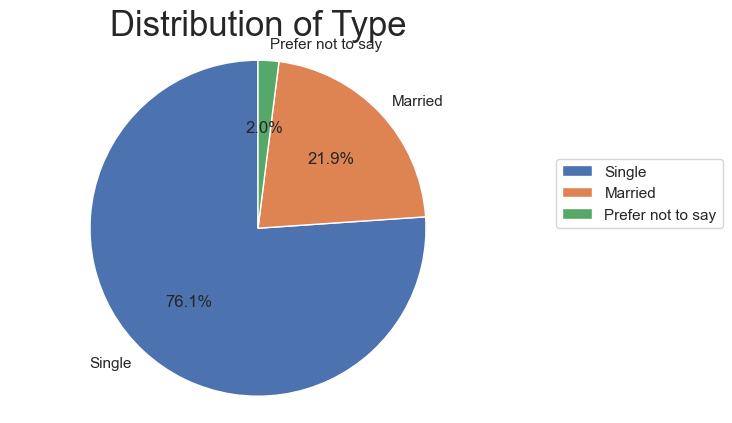

In [11]:
labels = "Single","Married","Prefer not to say"
plt.pie(x= marital,autopct='%1.1f%%',
shadow=False,startangle=90,labels=labels)
plt.axis('equal')
plt.title('Distribution of Type', fontsize = 25)
plt.legend(loc = (1.1,0.5))
plt.show()

According to the above figure, 76.1% of the frequent customers are singles. Now let’s have a look at what’s the income group of the customers who ordered the food again:

In [12]:
income = buying_again_data["Monthly Income"].value_counts()
income

Monthly Income
No Income          164
More than 50000     44
25001 to 50000      42
10001 to 25000      32
Below Rs.10000      19
Name: count, dtype: int64

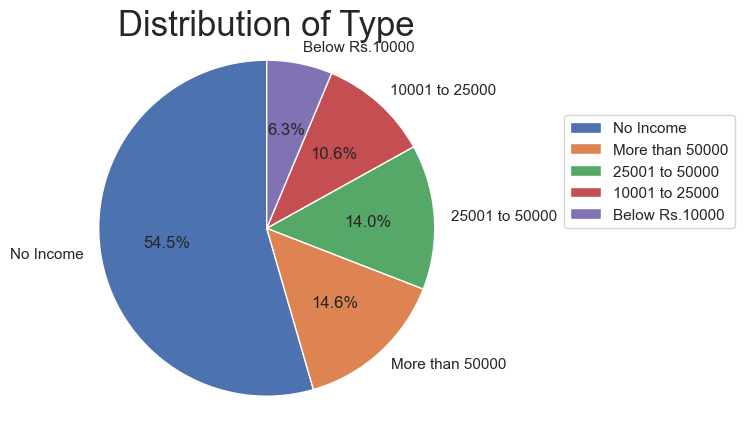

In [13]:
labels = income.index
plt.pie(x= income,autopct='%1.1f%%',
shadow=False,startangle=90,labels=labels)
plt.axis('equal')
plt.title('Distribution of Type', fontsize = 25)
plt.legend(loc = (1.1,0.5))
plt.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be housewives or students.

Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:

In [14]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 50000, 
                                                     "More than 50000": 70000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,Yes,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,Yes,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,Yes,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,Yes,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,Yes,1,Yes


Now let’s train a machine learning model to predict whether a customer will order again or not. I will start by splitting the data into training and test sets:



### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9487179487179487


Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not:

In [16]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again


Enter the Age of the Customer:  25
Enter the Gender of the Customer (1 = Male, 0 = Female):  1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed):  1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4):  2
Monthly Income:  50000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5):  1
Family Size:  3
Pin Code:  560001
Review of the Last Order (1 = Positive, 0 = Negative):  1


Finding if the customer will order again:  ['Yes']
